In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bengaliai-cv19/train.csv
/kaggle/input/bengaliai-cv19/train_image_data_2.parquet
/kaggle/input/bengaliai-cv19/test_image_data_1.parquet
/kaggle/input/bengaliai-cv19/class_map.csv
/kaggle/input/bengaliai-cv19/train_image_data_3.parquet
/kaggle/input/bengaliai-cv19/test_image_data_2.parquet
/kaggle/input/bengaliai-cv19/train_image_data_1.parquet
/kaggle/input/bengaliai-cv19/test_image_data_0.parquet
/kaggle/input/bengaliai-cv19/test.csv
/kaggle/input/bengaliai-cv19/train_image_data_0.parquet
/kaggle/input/bengaliai-cv19/sample_submission.csv
/kaggle/input/bengaliai-cv19/test_image_data_3.parquet


In [2]:
!pip install wandb --upgrade

     |████████████████████████████████| 1.4 MB 8.9 MB/s 
  Attempting uninstall: wandb
    Found existing installation: wandb 0.8.27
    Uninstalling wandb-0.8.27:
      Successfully uninstalled wandb-0.8.27


In [3]:
!wandb login ***REMOVED***

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [4]:
!pip install webdavclient3

  Created wheel for webdavclient3: filename=webdavclient3-3.14-py3-none-any.whl size=27166 sha256=647241fd430ac5d8cf9501e27da5c4cda97d203014f91566dc646619e1d4a925
  Stored in directory: /root/.cache/pip/wheels/70/b9/51/4a84e36476c1f6469e0d41d0b9c7341ecea7421762d685d1a0
Successfully built webdavclient3


In [5]:
from webdav3.client import Client
from kaggle_secrets import UserSecretsClient

options = {
 'webdav_hostname': "https://joeranbosma.stackstorage.com/remote.php/webdav",
 'webdav_login':    "MLiP",
 'webdav_password': UserSecretsClient().get_secret("webdav_pass")
}
client = Client(options)

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from starter_eda_model_funcs import MultiOutputDataGenerator
from helper import to_one_hot, preview_data_aug
from preprocessing import perform_preprocessing
from flow_kaggle import generators_from_prep, generator_wrapper, train

# Load adapted model
from model_test_feature_selection import get_model_feature_training

# further settings
FIG_DIR = 'results/generated_figs/'
plt.rcParams["figure.figsize"] = (10, 4.5) # set higher on 4k monitor
plt.rcParams["savefig.format"] = "pdf"
plt.rcParams["savefig.dpi"] = 400
plt.rcParams["savefig.transparent"] = True
plt.rcParams.update({'font.size': 16})
plt.rcParams["savefig.bbox"] = 'tight'

Start training of prep_96_5...
Performing data preprocessing...


Part 3: 100%|██████████| 50210/50210 [00:58<00:00, 853.30it/s]


Converting grapheme_root to one-hot encoding
Converting vowel_diacritic to one-hot encoding
Converting consonant_diacritic to one-hot encoding
Found 175735 validated image filenames.
Found 25105 validated image filenames.


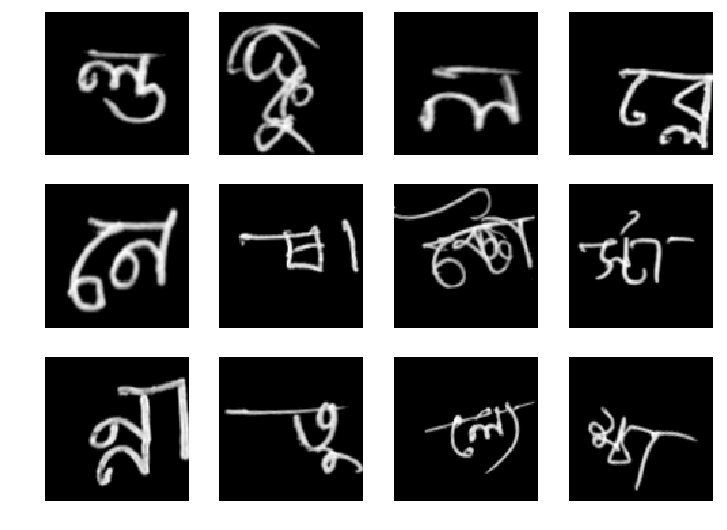

Creating directory in WebDAV client: models/prep_96_5//


Train for 686 steps, validate for 98 steps
686/686 [==============================] - 379s 552ms/step - loss: 2.4821 - out_root_loss: 3.9793 - out_vowel_loss: 1.0559 - out_consonant_loss: 0.9138 - out_root_acc: 0.0946 - out_vowel_acc: 0.6288 - out_consonant_acc: 0.6877 - val_loss: 1.4916 - val_out_root_loss: 2.4795 - val_out_vowel_loss: 0.5025 - val_out_consonant_loss: 0.5050 - val_out_root_acc: 0.3045 - val_out_vowel_acc: 0.8296 - val_out_consonant_acc: 0.8182
Train for 686 steps, validate for 98 steps
Epoch 2/2
686/686 [==============================] - 357s 521ms/step - loss: 1.0994 - out_root_loss: 1.7461 - out_vowel_loss: 0.5077 - out_consonant_loss: 0.3976 - out_root_acc: 0.5066 - out_vowel_acc: 0.8300 - out_consonant_acc: 0.8650 - val_loss: 0.4296 - val_out_root_loss: 0.6641 - val_out_vowel_loss: 0.2059 - val_out_consonant_loss: 0.1843 - val_out_root_acc: 0.8054 - val_out_vowel_acc: 0.9383 - val_out_consonant_acc: 0.9437
Train for 686 steps, validate for 98 steps
Epoch 3/3
686/6

NameError: name 'shutil' is not defined

In [7]:
datagen_args = dict(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.15, # Randomly zoom image 
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
    shear_range=8, #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
)

cross_val_parts = 8 # for 12.5% validation data and 87.5% train data
cross_val_num = 0 # which part (shuffled) from [0, ..., n-1]


# non-drop-out 32x32
roi_size = 32-10
padding_size = 5

preprocess_args = dict(
        image_width=roi_size_option + padding*2,
        image_height=roi_size + padding*2,
        padding=padding,
        cross_val_num=cross_val_num,
        cross_val_parts=cross_val_parts,
    )

model_name      = f"prep_{roi_size}_{padding}"
prep_path = f"/kaggle/working/prep/prep_{roi_size}_{padding}/"
model_path = f'/kaggle/working/models/{model_name}/'
external_path = f'models/{model_name}/'
    
if not os.path.exists(model_path):
    os.makedirs(model_path)

# define model
model_32_no_max_pool= get_model_feature_training(False,img_size = 32, loss_weights=[0.5, 0.25, 0.25])

# TODO: ensure model_name refers to adapted model
# train model
print(f"Start training of {model_name}...")
model = train(model = model_32_no_max_pool, name = model_name, prep_path=prep_path, data_path='/kaggle/input/bengaliai-cv19/',
              model_path=model_path, datagen_args = datagen_args,
              preprocess_args = preprocess_args, cross_val_parts = cross_val_parts,
              cross_val_num = cross_val_num, epochs=30, webdav_client=client,
              external_path=external_path)
    
# TODO: move this till end?
# clean up
shutil.rmtree(prep_path)

In [ ]:
# with pooling 64x64
roi_size = 64-10
padding_size = 5

preprocess_args = dict(
        image_width=roi_size_option + padding*2,
        image_height=roi_size + padding*2,
        padding=padding,
        cross_val_num=cross_val_num,
        cross_val_parts=cross_val_parts,
    )

model_name      = f"prep_{roi_size}_{padding}"
prep_path = f"/kaggle/working/prep/prep_{roi_size}_{padding}/"
model_path = f'/kaggle/working/models/{model_name}/'
external_path = f'models/{model_name}/'
    
if not os.path.exists(model_path):
    os.makedirs(model_path)

# define model
model_64_yes_max_pool= get_model_feature_training(True,img_size = 64, loss_weights=[0.5, 0.25, 0.25])

# TODO: ensure model_name refers to adapted model
# train model
print(f"Start training of {model_name}...")
model = train(model = model_64_yes_max_pool, name = model_name, prep_path=prep_path, data_path='/kaggle/input/bengaliai-cv19/',
              model_path=model_path, datagen_args = datagen_args,
              preprocess_args = preprocess_args, cross_val_parts = cross_val_parts,
              cross_val_num = cross_val_num, epochs=30, webdav_client=client,
              external_path=external_path)
    

# Keep preprocessing of 64 for next 64 without max pooling


In [ ]:
roi_size = 64-10
padding_size = 5

preprocess_args = dict(
        image_width=roi_size_option + padding*2,
        image_height=roi_size + padding*2,
        padding=padding,
        cross_val_num=cross_val_num,
        cross_val_parts=cross_val_parts,
    )

model_name      = f"prep_{roi_size}_{padding}"
prep_path = f"/kaggle/working/prep/prep_{roi_size}_{padding}/"
model_path = f'/kaggle/working/models/{model_name}/'
external_path = f'models/{model_name}/'
    
if not os.path.exists(model_path):
    os.makedirs(model_path)

# define model
model_64_no_max_pool= get_model_feature_training(False,img_size = 64, loss_weights=[0.5, 0.25, 0.25])

# TODO: ensure model_name refers to adapted model
# train model
print(f"Start training of {model_name}...")
model = train(model = model_64_no_max_pool, name = model_name, prep_path=prep_path, data_path='/kaggle/input/bengaliai-cv19/',
              model_path=model_path, datagen_args = datagen_args,
              preprocess_args = preprocess_args, cross_val_parts = cross_val_parts,
              cross_val_num = cross_val_num, epochs=30, webdav_client=client,
              external_path=external_path)
    
# TODO: move this till end?
# clean up
shutil.rmtree(prep_path)

In [ ]:
# with pooling 128x128
roi_size = 128-10
padding_size = 5

preprocess_args = dict(
        image_width=roi_size_option + padding*2,
        image_height=roi_size + padding*2,
        padding=padding,
        cross_val_num=cross_val_num,
        cross_val_parts=cross_val_parts,
    )

model_name      = f"prep_{roi_size}_{padding}"
prep_path = f"/kaggle/working/prep/prep_{roi_size}_{padding}/"
model_path = f'/kaggle/working/models/{model_name}/'
external_path = f'models/{model_name}/'
    
if not os.path.exists(model_path):
    os.makedirs(model_path)

# define model
model_128_yes_max_pool= get_model_feature_training(True,img_size = 128, loss_weights=[0.5, 0.25, 0.25])

# TODO: ensure model_name refers to adapted model
# train model
print(f"Start training of {model_name}...")
model = train(model = model_128_yes_max_pool, name = model_name, prep_path=prep_path, data_path='/kaggle/input/bengaliai-cv19/',
              model_path=model_path, datagen_args = datagen_args,
              preprocess_args = preprocess_args, cross_val_parts = cross_val_parts,
              cross_val_num = cross_val_num, epochs=30, webdav_client=client,
              external_path=external_path)
    